In [1]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy

In [2]:
def plot_image(file_name):
    tgt_image = np.load(os.path.join(base_path, "tgt_image", file_name))
    depth = np.load(os.path.join(base_path, "depth", file_name))
    src_image_stack = np.load(os.path.join(base_path, "src_image_stack", file_name))
    bwd_rigid_error = np.load(os.path.join(base_path, "bwd_rigid_error", file_name))
    fwd_rigid_error = np.load(os.path.join(base_path, "fwd_rigid_error", file_name))
    bwd_rigid_warp = np.load(os.path.join(base_path, "bwd_rigid_warp", file_name))
    fwd_rigid_warp = np.load(os.path.join(base_path, "fwd_rigid_warp", file_name))
    
    plt.figure(figsize=(18,18))
    plt.subplot(6,3,1)
    plt.imshow((src_image_stack[0,:,:,0:3]+1)/2)
    plt.title("src_1")

    plt.subplot(6,3,2)
    plt.imshow((tgt_image[0]+1)/2) # t
    plt.title("tgt")

    plt.subplot(6,3,3)
    plt.imshow((src_image_stack[0,:,:,3:6]+1)/2)
    plt.title("src_2")

    plt.subplot(6,3,4)
    plt.imshow(1.0/depth[1,:,:,0], cmap="plasma")
    plt.title("src_1_depth")

    plt.subplot(6,3,5)
    plt.imshow(1.0/depth[0,:,:,0], cmap="plasma")
    plt.title("tgt_depth")

    plt.subplot(6,3,6)
    plt.imshow(1.0/depth[2,:,:,0], cmap="plasma")
    plt.title("src_2_depth")

    plt.subplot(6,3,7)
    plt.imshow((fwd_rigid_warp[0]+1)/2)
    plt.title("fwd warp: src_1->tgt")

    plt.subplot(6,3,8)
    plt.imshow((fwd_rigid_warp[1]+1)/2)
    plt.title("fwd warp: src_2->tgt")

    plt.subplot(6,3,10)
    plt.imshow((bwd_rigid_warp[0]+1)/2)
    plt.title("bwd warp: tgt->src_1")

    plt.subplot(6,3,11)
    plt.imshow((bwd_rigid_warp[1]+1)/2)
    plt.title("bwd warp: tgt->src_2")

    plt.subplot(6,3,13)
    plt.imshow(fwd_rigid_error[0])
    plt.colorbar()
    plt.title("fwd err: src_1->tgt vs tgt")

    plt.subplot(6,3,14)
    plt.imshow(fwd_rigid_error[1])
    plt.colorbar()
    plt.title("fwd err: src_2->tgt vs tgt")

    plt.subplot(6,3,16)
    plt.imshow(bwd_rigid_error[0])
    plt.colorbar()
    plt.title("bwd err: tgt->src_1 vs src_1")

    plt.subplot(6,3,17)
    plt.imshow(bwd_rigid_error[1])
    plt.colorbar()
    plt.title("bwd err: tgt->src_2 vs sr_2")

    plt.show()

    plt.close()

In [4]:
# ori_path = "/userhome/34/h3567721/projects/Depth/GeoNet/predictions"
# base_path = ori_path+"/convert_rgb_to_lab/model-100000"
ori_path = "/userhome/34/h3567721/projects/Depth/GeoNet/predictions"
base_path = ori_path+"/depth_geo_delta_sigmoid_minus_0.5_scale_5_semantic/model-150000"
# ori_path = "/userhome/34/h3567721/projects/Depth/GeoNet-ori/predictions"
# base_path = ori_path+"/checkpoint_depth/model-150000"

In [3]:
ori_path = "/userhome/34/h3567721/projects/Depth/GeoNet-ori/predictions"
# base_path = ori_path+"/iterative_scratch_fix_pose_10/model-10000"
# base_path = ori_path+"/checkpoint_depth/model-150000"
base_path = ori_path+"/convert_rgb_to_lab_test_lab/model-250000"

In [4]:
file_name = "2011_09_26_drive_0027_sync_02_0000000007.npy"

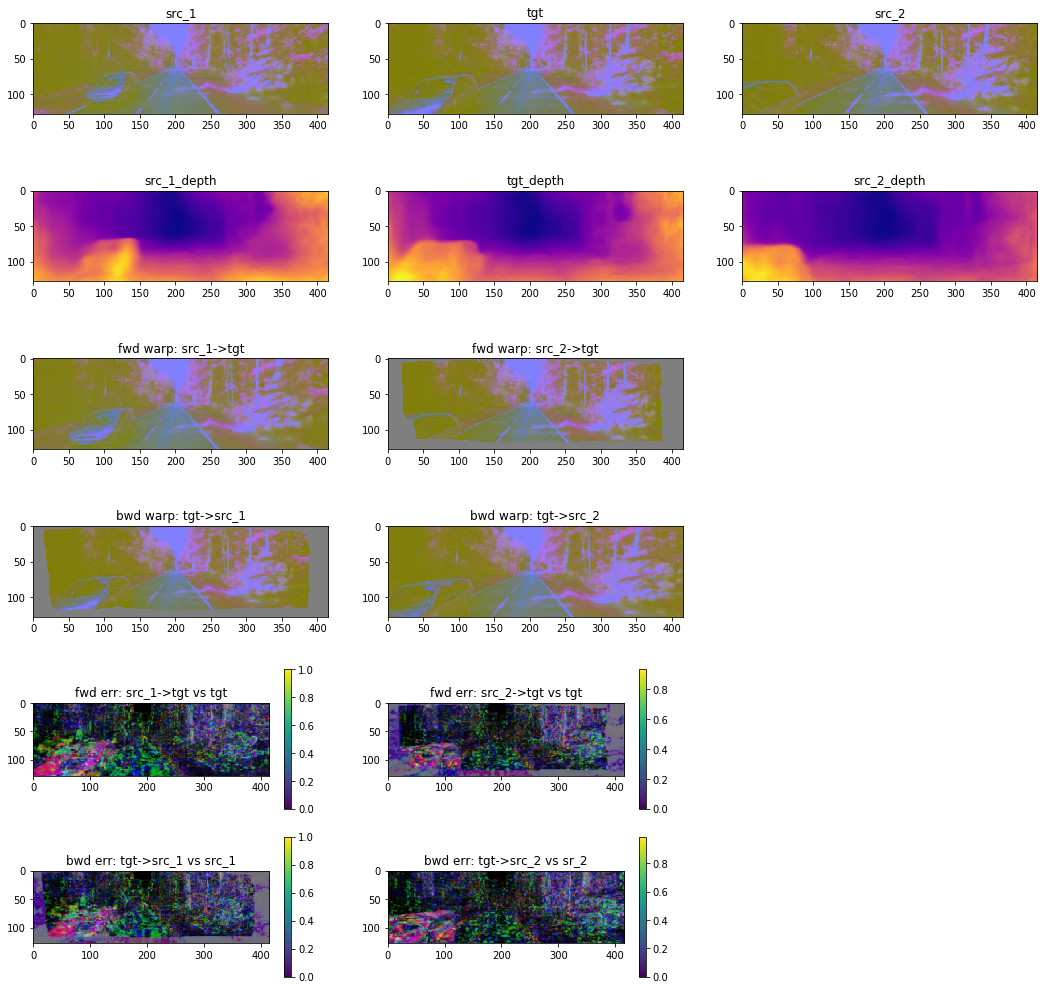

In [5]:
plot_image(file_name)

In [14]:
pred_depth = np.load(os.path.join(ori_path, base_path, "pred_depth", file_name))

In [15]:
np.median(pred_depth[depth_mask])

6.01231

In [9]:
def vis_depth(file_name):
    pred_depth = np.load(os.path.join(ori_path, base_path, "pred_depth", file_name))
    gt_depth = np.load(os.path.join(ori_path, base_path, "gt_depth", file_name))
    depth_mask = np.load(os.path.join(ori_path, base_path, "depth_mask", file_name))
    scaled_depth = np.load(os.path.join(ori_path, base_path, "scaled_depth", file_name))
    scalor = np.median(gt_depth[depth_mask])/np.median(pred_depth[depth_mask])
    
    plt.figure(figsize=(18,12))
    
    plt.subplot(3,2,1)
    plt.imshow(gt_depth, cmap = "binary")
    plt.colorbar()
    plt.title("GT depth")
    
    plt.subplot(3,2,2)
    gt_depth_copy = copy.deepcopy(gt_depth)
    gt_depth_copy[~depth_mask]= 0
    plt.imshow(gt_depth_copy, cmap = "binary")
    plt.colorbar()
    plt.title("GT depth with range: [1e-3,80], crop: [-218, -3, 44, 1180]")
    
    plt.subplot(3,2,3)
    plt.imshow(pred_depth, cmap="plasma")
    plt.colorbar()
    plt.title("predicted depth")
    
    plt.subplot(3,2,4)
    plt.imshow(scaled_depth, cmap="plasma")
    plt.colorbar()
    plt.title("scaled predicted depth, scalor: "+str(scalor))
    
    plt.subplot(3,2,5)
    scaled_depth_copy = copy.deepcopy(scaled_depth)
    scaled_depth_copy[~depth_mask]= 0
    plt.imshow(scaled_depth_copy, cmap = "binary")
    plt.colorbar()
    plt.title("scaled predicted depth with GT sample mask")
    
    plt.subplot(3,2,6)
    scaled_depth_copy_mask = copy.deepcopy(scaled_depth_copy)
    scaled_depth_copy_mask[scaled_depth_copy_mask < 1e-3] = 1e-3
    scaled_depth_copy_mask[scaled_depth_copy_mask > 80.0] = 80.0
    plt.imshow(scaled_depth_copy_mask, cmap = "binary")
    plt.colorbar()
    plt.title("scaled predicted depth with GT sample and range[1e-3, 80] mask")

    plt.show()
    plt.close()

In [10]:
def vis_depth_large(file_name):
    pred_depth = np.load(os.path.join(ori_path, base_path, "pred_depth", file_name))
    gt_depth = np.load(os.path.join(ori_path, base_path, "gt_depth", file_name))
    depth_mask = np.load(os.path.join(ori_path, base_path, "depth_mask", file_name))
    scaled_depth = np.load(os.path.join(ori_path, base_path, "scaled_depth", file_name))
    scalor = np.median(gt_depth[depth_mask])/np.median(pred_depth[depth_mask])
    
    plt.figure(figsize=(18,12))
    plt.imshow(gt_depth, cmap = "binary")
    plt.colorbar()
    plt.title("GT depth")
    plt.show()
    
    plt.figure(figsize=(18,12))
    gt_depth_copy = copy.deepcopy(gt_depth)
    gt_depth_copy[~depth_mask]= 0
    plt.imshow(gt_depth_copy, cmap = "binary")
    plt.colorbar()
    plt.title("GT depth with range: [1e-3,80], crop: [-218, -3, 44, 1180]")
    plt.show()
    
    plt.figure(figsize=(18,12))
    plt.imshow(pred_depth, cmap="plasma")
    plt.colorbar()
    plt.title("predicted depth")
    plt.show()
    
    plt.figure(figsize=(18,12))
    plt.imshow(scaled_depth, cmap="plasma")
    plt.colorbar()
    plt.title("scaled predicted depth, scalor: "+str(scalor))
    plt.show()
    
    
    plt.figure(figsize=(18,12))
    scaled_depth_copy = copy.deepcopy(scaled_depth)
    scaled_depth_copy[~depth_mask]= 0
    plt.imshow(scaled_depth_copy, cmap = "binary")
    plt.colorbar()
    plt.title("scaled predicted depth with GT sample mask")
    plt.show()
    
    plt.figure(figsize=(18,12))
    scaled_depth_copy_mask = copy.deepcopy(scaled_depth_copy)
    scaled_depth_copy_mask[scaled_depth_copy_mask < 1e-3] = 1e-3
    scaled_depth_copy_mask[scaled_depth_copy_mask > 80.0] = 80.0
    plt.imshow(scaled_depth_copy_mask, cmap = "binary")
    plt.colorbar()
    plt.title("scaled predicted depth with GT sample and range[1e-3, 80] mask")
    plt.show()

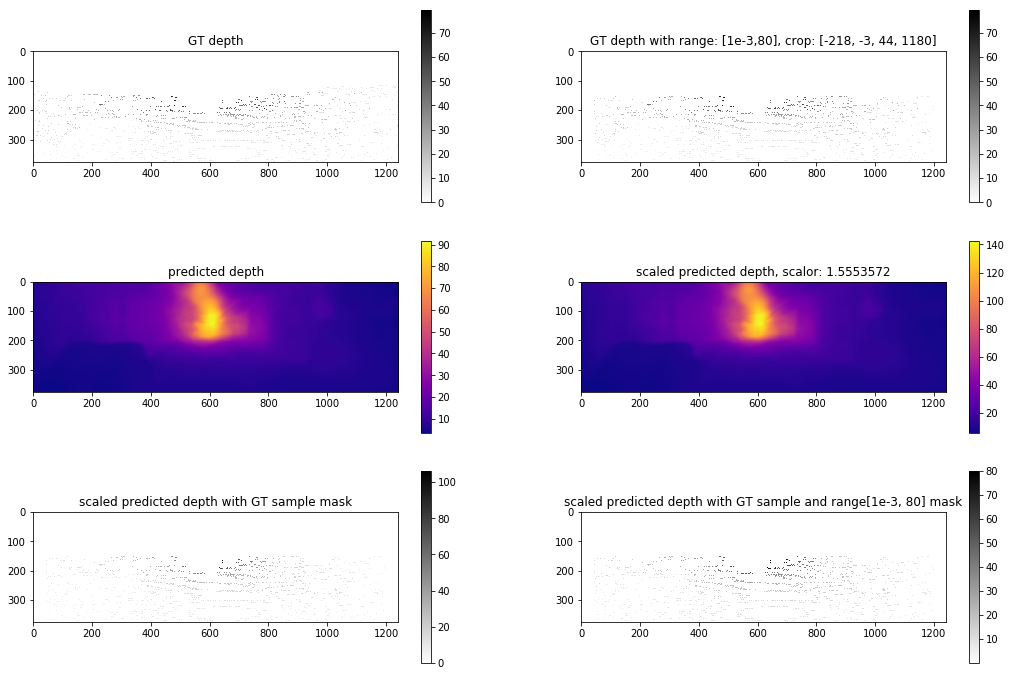

In [11]:
vis_depth(file_name)

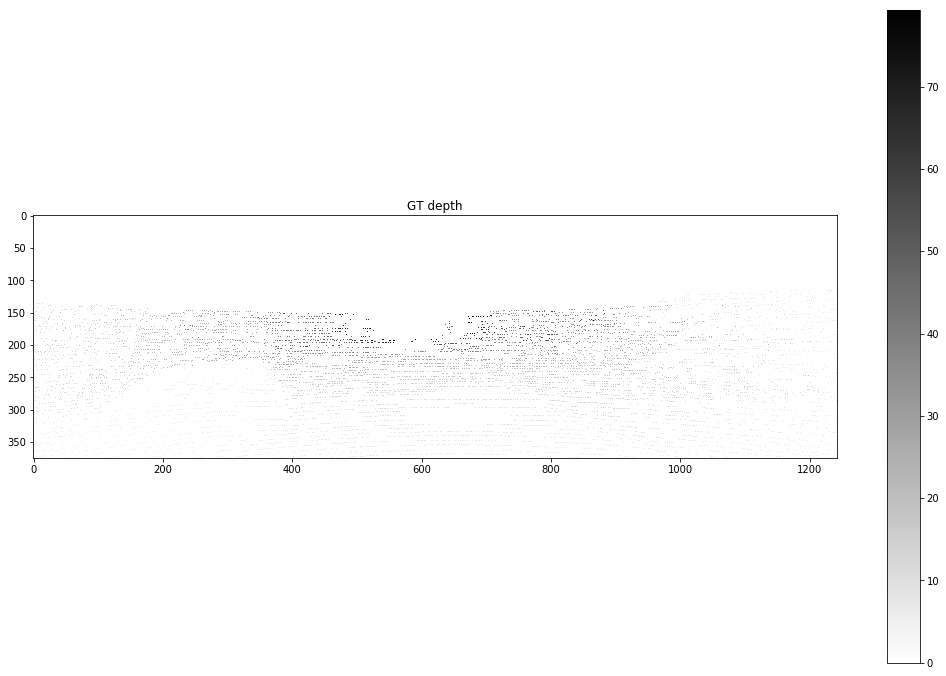

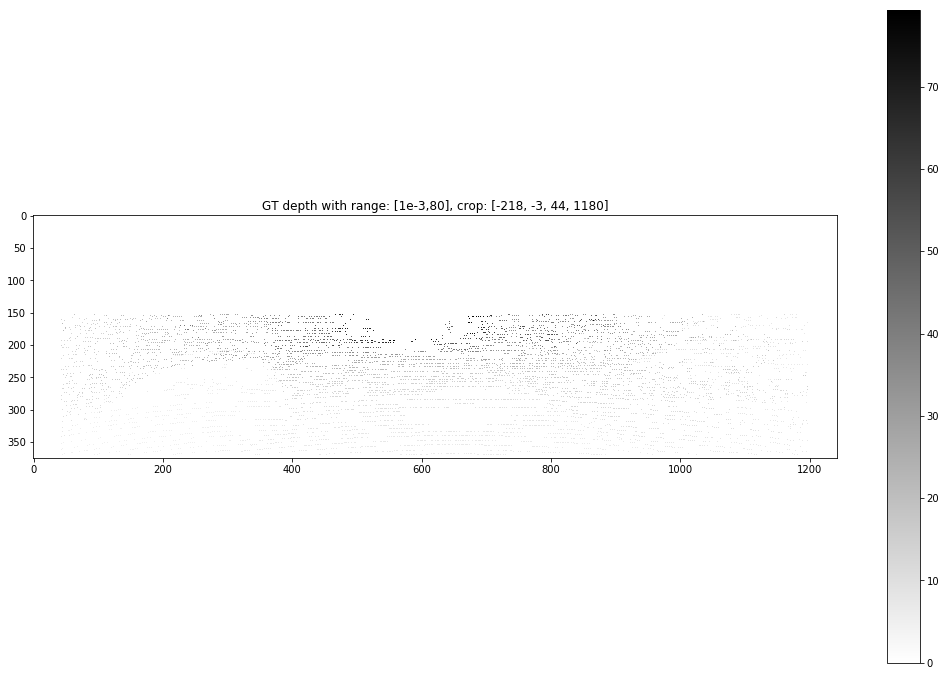

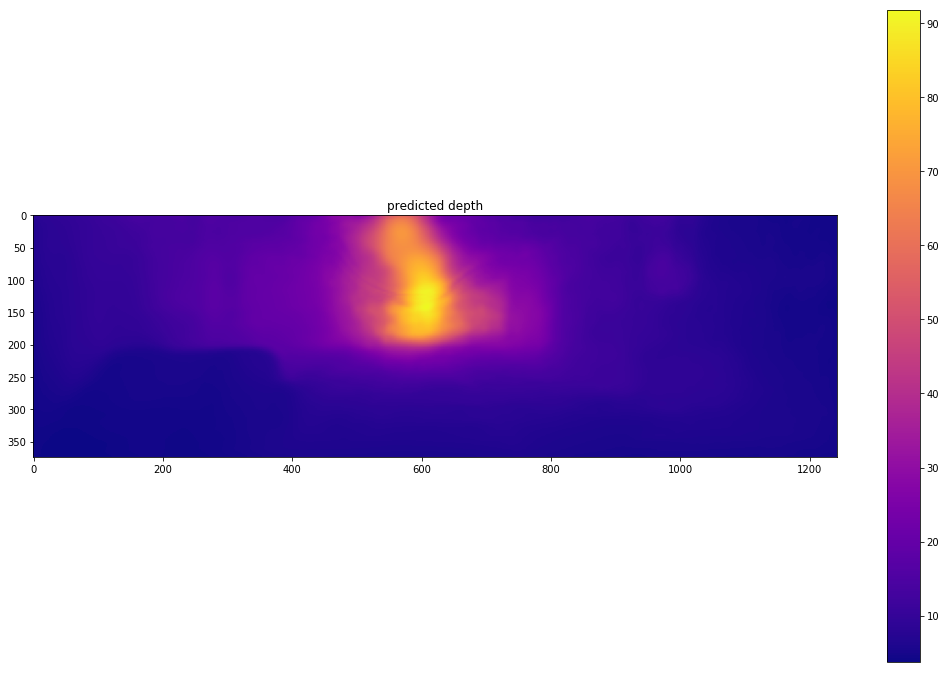

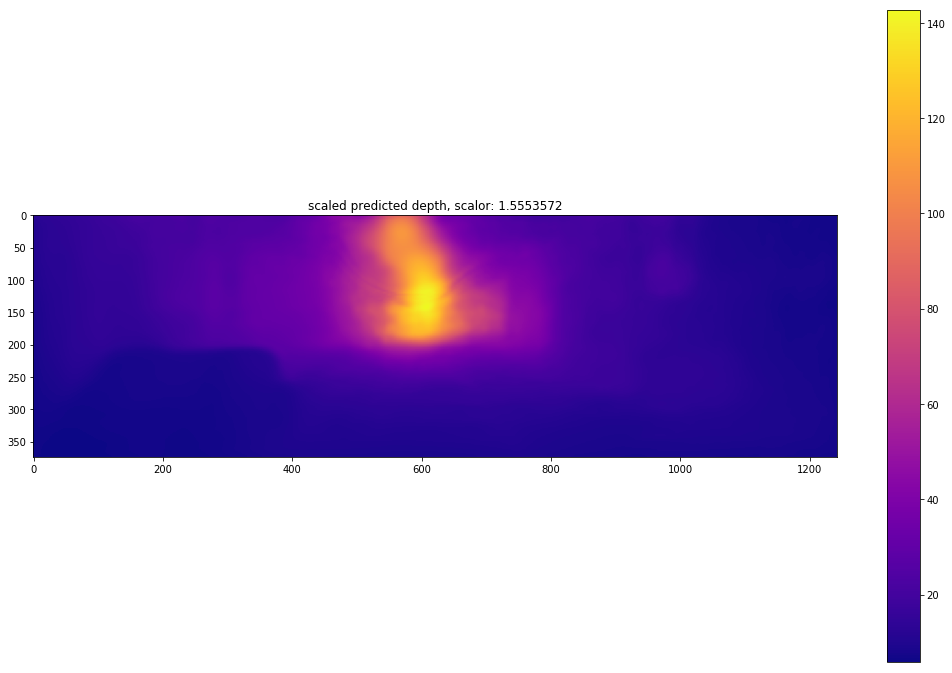

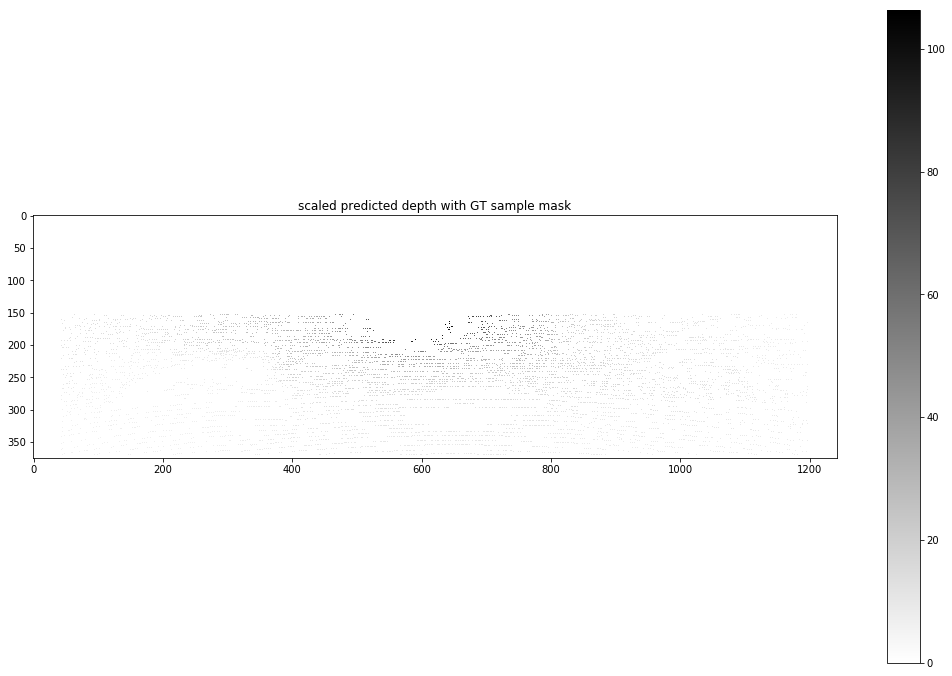

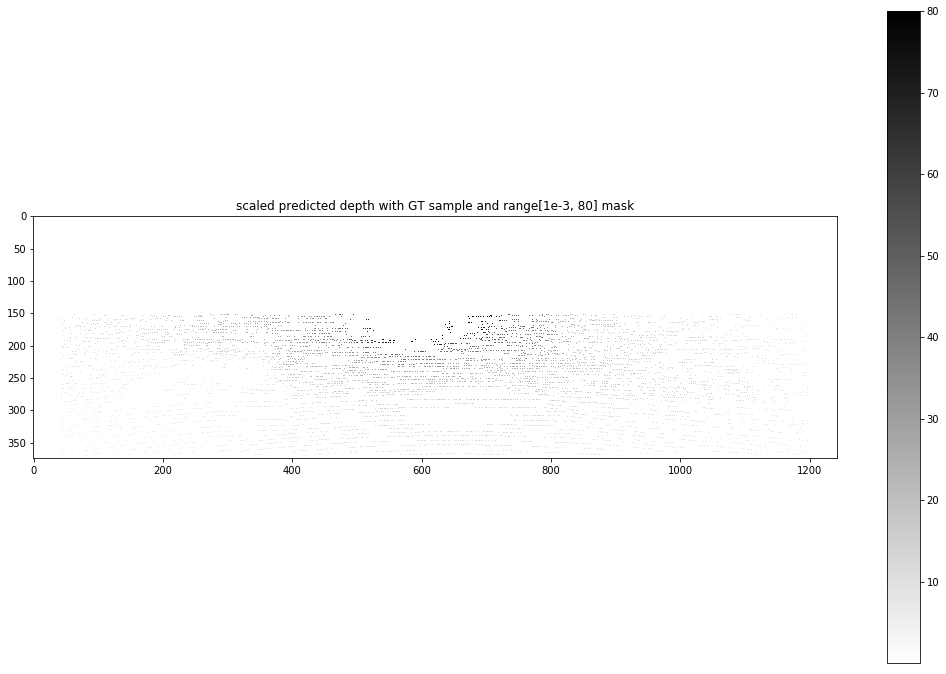

In [12]:
vis_depth_large(file_name)

In [6]:
def vis_abs_rel(file_name):
    pred_depth = np.load(os.path.join(ori_path, base_path, "pred_depth", file_name))
    gt_depth = np.load(os.path.join(ori_path, base_path, "gt_depth", file_name))
    depth_mask = np.load(os.path.join(ori_path, base_path, "depth_mask", file_name))
    scaled_depth = np.load(os.path.join(ori_path, base_path, "scaled_depth", file_name))
    scalor = np.median(gt_depth[depth_mask])/np.median(pred_depth[depth_mask])

    gt_depth_copy = copy.deepcopy(gt_depth)
    gt_depth_copy[~depth_mask]= 0
    
    scaled_depth_copy = copy.deepcopy(scaled_depth)
    scaled_depth_copy[~depth_mask]= 0
    scaled_depth_copy_mask = copy.deepcopy(scaled_depth_copy)
    scaled_depth_copy_mask[scaled_depth_copy_mask < 1e-3] = 1e-3
    scaled_depth_copy_mask[scaled_depth_copy_mask > 80.0] = 80.0
    
    abs_rel_map = np.abs(gt_depth_copy - scaled_depth_copy_mask)/gt_depth_copy
    
    abs_rel = np.mean(np.abs(gt_depth_copy[depth_mask] - 
                             scaled_depth_copy_mask[depth_mask])/gt_depth_copy[depth_mask])
    
    print(np.min(gt_depth_copy[depth_mask]))
    print(np.min(scaled_depth_copy_mask[depth_mask]))
    print("abs_rel", abs_rel)

    plt.figure(figsize=(18,16))
    plt.subplot(3,2,1)
    plt.hist(pred_depth.reshape([-1]), bins=1000)
    plt.title("1 pred_depth histogram")
    
    plt.subplot(3,2,2)
    plt.hist(scaled_depth.reshape([-1]), bins=1000)
    plt.title("2 scaled_pred_depth histogram")

    plt.subplot(3,2,3)
    plt.hist(gt_depth_copy[depth_mask], bins=1000)
    plt.title("3 gt_depth mask histogram")

    plt.subplot(3,2,4)
    plt.hist(scaled_depth_copy_mask[depth_mask], bins=1000)
    plt.title("4 clip sclaed_pred_depth mask histogram")
    
    plt.subplot(3,2,5)
    plt.imshow(abs_rel_map, cmap="plasma")
    plt.colorbar()
    plt.title("5 abs_rel_map, 3 VS 4")
    
    plt.subplot(3,2,6)
    plt.hist(abs_rel_map[depth_mask].reshape([-1]), bins=1000)
    plt.title("6 histogram of 5")
    
    plt.show()
    plt.close()

/userhome/34/h3567721/anaconda3/envs/geonet-v/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in divide


4.728
5.7936068
('abs_rel', 0.2673158)


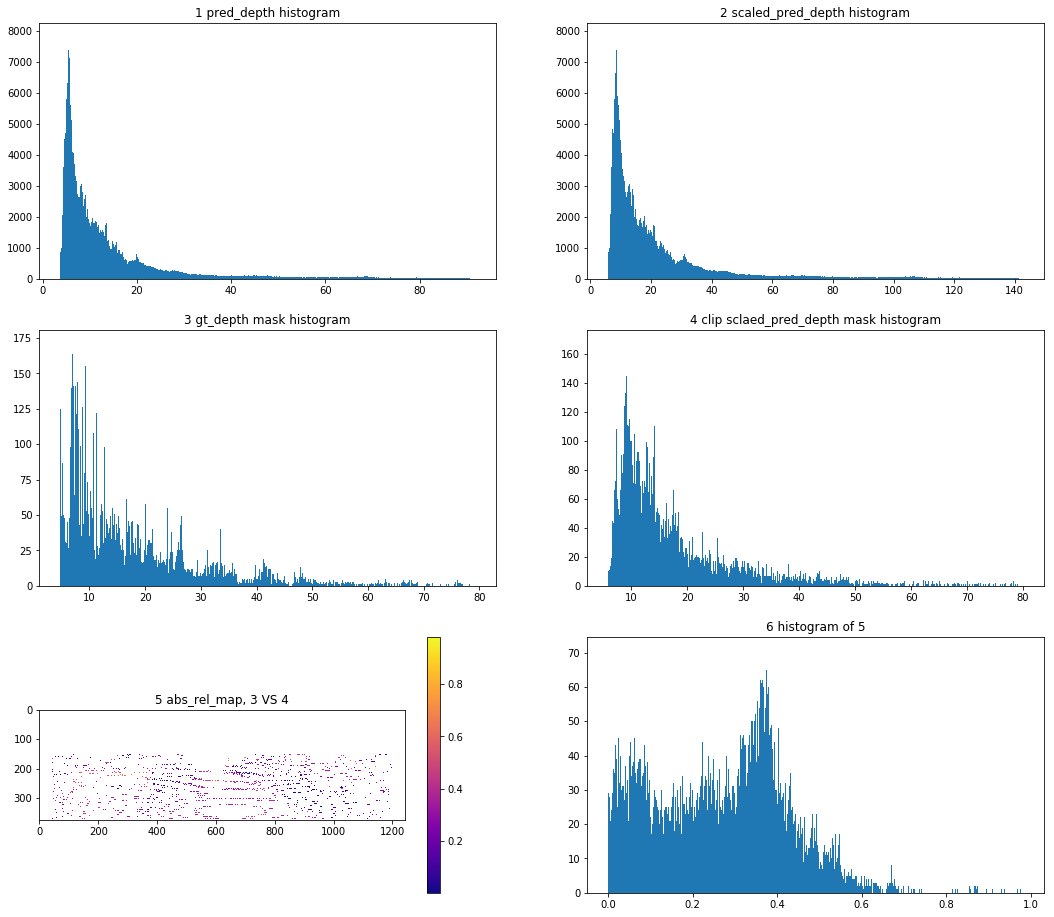

In [8]:
vis_abs_rel(file_name)

In [44]:
depth = np.load(os.path.join(ori_path, base_path, "depth", file_name))
print(depth.shape)

(3, 128, 416, 1)


In [26]:
delta = np.load(os.path.join(ori_path, base_path, "delta_xyz", file_name))
print(delta.shape)

(1, 128, 416, 12)


<IPython.core.display.Javascript object>


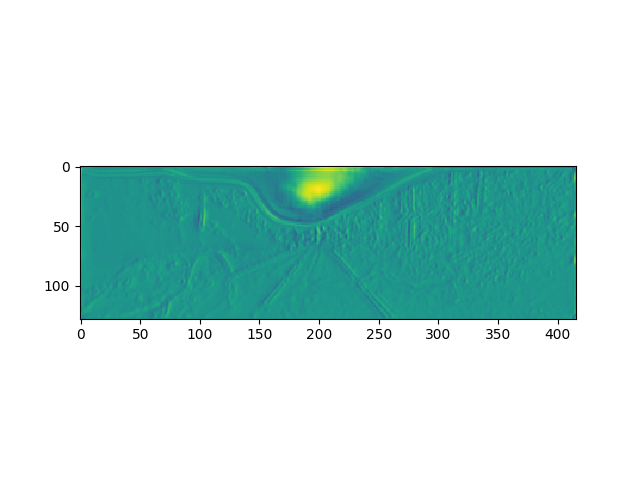

In [27]:
%matplotlib notebook
plt.imshow(delta[0,:,:,0])
plt.show()

<IPython.core.display.Javascript object>


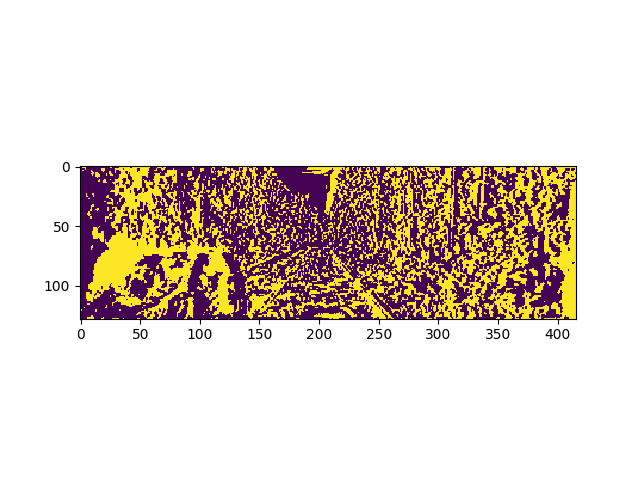

In [19]:
%matplotlib notebook
plt.imshow(delta[0,:,:,0]<0)
plt.show()

<IPython.core.display.Javascript object>


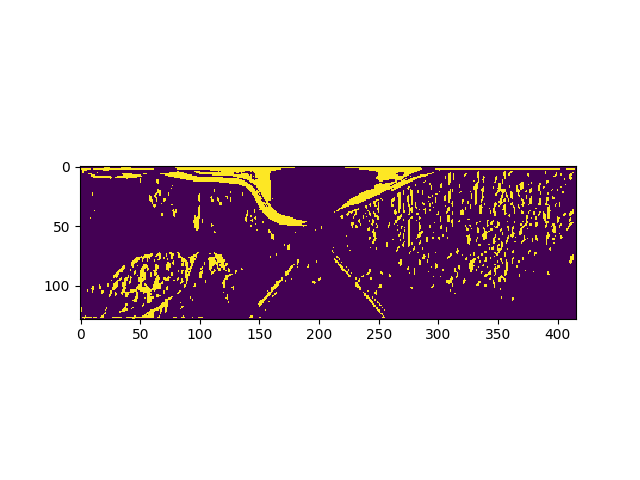

In [14]:
%matplotlib notebook
plt.imshow(delta[0,:,:,2]<0)
plt.show()

<IPython.core.display.Javascript object>


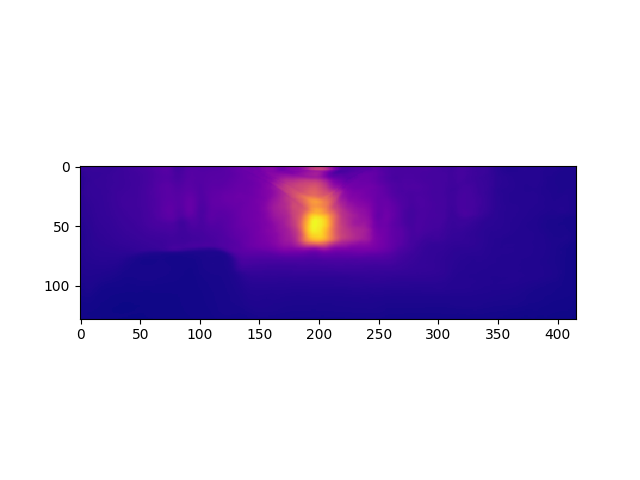

In [37]:
%matplotlib notebook
plt.imshow(depth[0,:,:,0], cmap="plasma")
plt.show()

In [39]:
np.median(depth[0,:,:,0])

5.206847

<IPython.core.display.Javascript object>


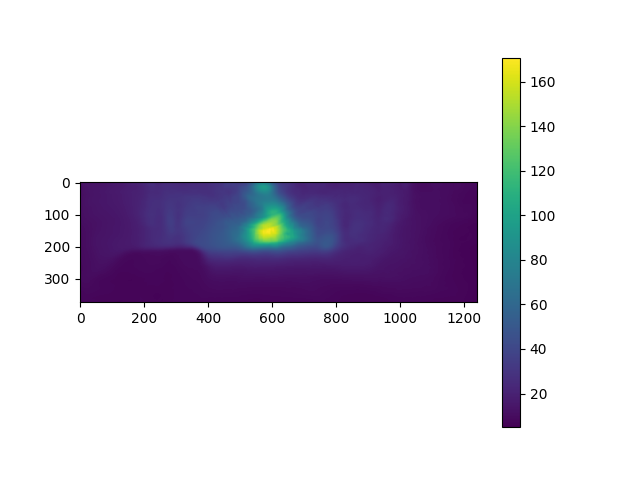

In [45]:
%matplotlib notebook
plt.imshow(depth[0,:,:,0]/np.median(depth[0,:,:,0]), cmap="plasma")
plt.show()

In [148]:
ori_path = "/userhome/34/h3567721/projects/Depth/GeoNet-ori/predictions"
base_path = ori_path+"/ignore_gray_warping_in_loss_pretrain/model-85000"

In [149]:
file_name = "2011_09_26_drive_0027_sync_02_0000000007.npy"

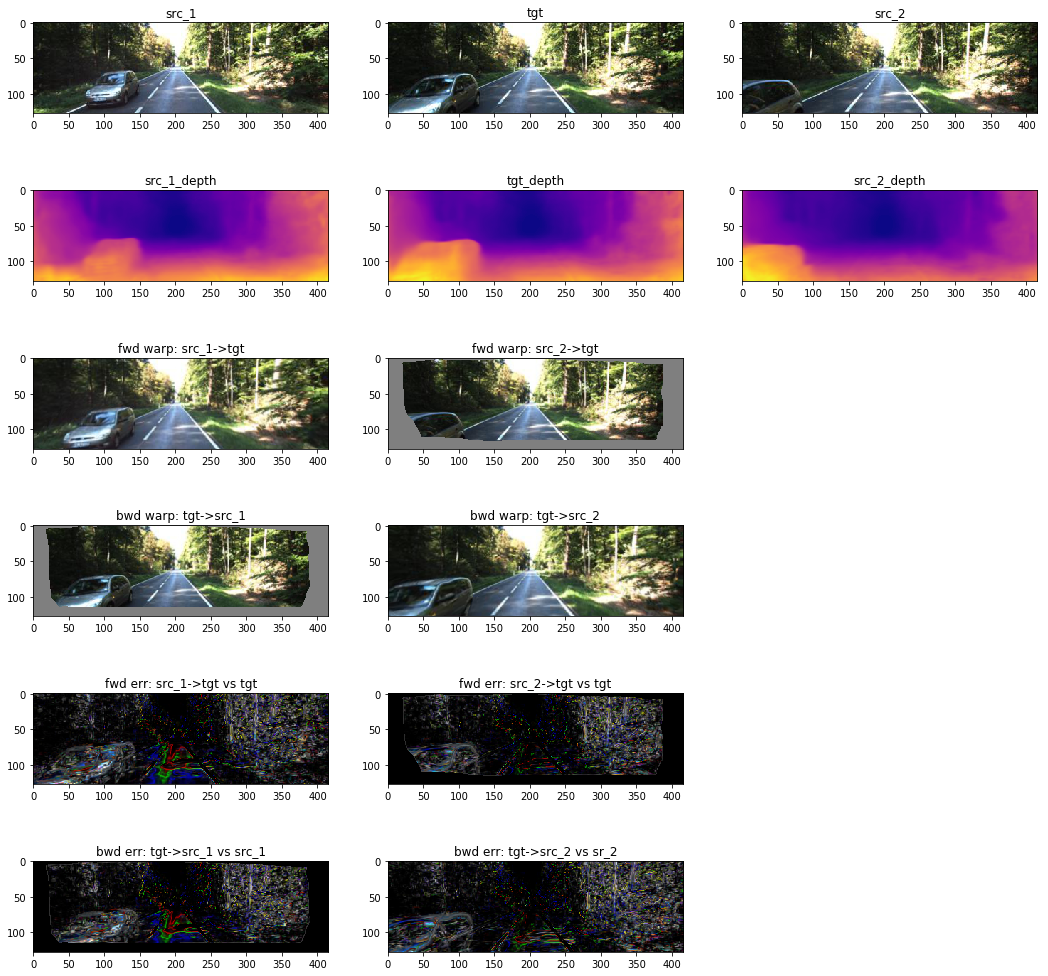

In [152]:
plot_image(file_name)